# Handwritten Digit Classification on MNIST Dataset.

Importing necessary library

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

Loading the requirred dataset for classification

In [125]:
mnist = fetch_openml('mnist_784')

In [126]:
x = mnist['data']
y = mnist['target']

In [127]:
x.shape,y.shape

((70000, 784), (70000,))

In [128]:
xarr = np.array(x)
yarr = np.array(y)

Image Analysis

In [130]:
import matplotlib
import matplotlib.pyplot as plt

digit = xarr[0]
digit_image = digit.reshape(28, 28)

'5'

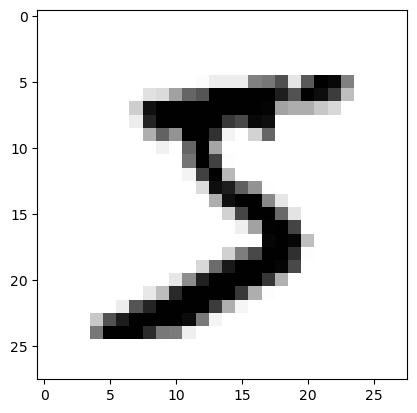

In [131]:
plt.imshow(digit_image, cmap=matplotlib.cm.binary, interpolation = "nearest")
yarr[0]

Splitting the dataset into train and test

In [133]:
x_train, x_test = xarr[:60000],xarr[60000:]
y_train, y_test = yarr[:60000],yarr[60000:]

Scaling the dataset

In [135]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
x_train_scaled = scaling.fit_transform(x_train)
x_test_scaled = scaling.transform(x_test)

# Implementing LogisticRegression

In [137]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)

In [138]:
classifier.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [139]:
y_pred = classifier.predict(x_test_scaled)
y_pred

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [140]:
y_test

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [141]:
from sklearn.metrics import accuracy_score

In [142]:
accuracy_score(y_pred,y_test)

0.9217

In [143]:
correct = 0
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        correct+=1
    else:
        continue
correct

9217

In [144]:
total = 10000
accuracy = (correct/total)*100
accuracy

92.17

In [145]:
predictions = classifier.predict(x_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)

In [146]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)

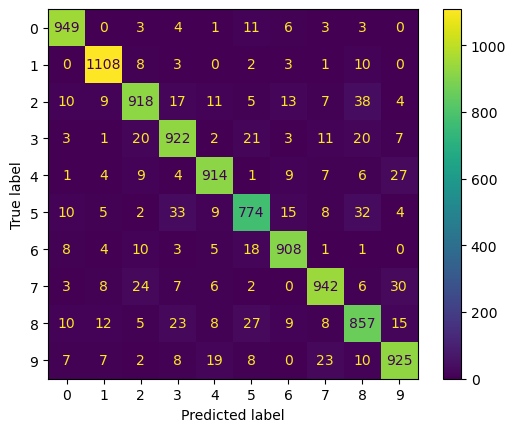

In [147]:
disp.plot()

In [151]:
d = sorted(list(set(y_test)))
d

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [156]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 949,    0,    3,    4,    1,   11,    6,    3,    3,    0],
       [   0, 1108,    8,    3,    0,    2,    3,    1,   10,    0],
       [  10,    9,  918,   17,   11,    5,   13,    7,   38,    4],
       [   3,    1,   20,  922,    2,   21,    3,   11,   20,    7],
       [   1,    4,    9,    4,  914,    1,    9,    7,    6,   27],
       [  10,    5,    2,   33,    9,  774,   15,    8,   32,    4],
       [   8,    4,   10,    3,    5,   18,  908,    1,    1,    0],
       [   3,    8,   24,    7,    6,    2,    0,  942,    6,   30],
       [  10,   12,    5,   23,    8,   27,    9,    8,  857,   15],
       [   7,    7,    2,    8,   19,    8,    0,   23,   10,  925]],
      dtype=int64)

In [157]:
cm[:,0]

array([949,   0,  10,   3,   1,  10,   8,   3,  10,   7], dtype=int64)

Accuracy among all classess

In [158]:
for i in range(cm.shape[0]):
    tp = cm[i,i]
    fn = sum(cm[i,:])- tp
    fp = sum(cm[:,i])- tp
    tn = total-fp-fn-tp
    class_acc = (tp+tn)/total
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2*precision*recall)/(precision+recall)
    print(f"The classwise accuracy of {d[i]} = {class_acc}, precision = {precision}, recall = {recall}, f1 = {f1}")

The classwise accuracy of 0 = 0.9917, precision = 0.948051948051948, recall = 0.9683673469387755, f1 = 0.9581019687026754
The classwise accuracy of 1 = 0.9923, precision = 0.9568221070811744, recall = 0.9762114537444934, f1 = 0.9664195377235063
The classwise accuracy of 2 = 0.9803, precision = 0.9170829170829171, recall = 0.8895348837209303, f1 = 0.9030988686669946
The classwise accuracy of 3 = 0.981, precision = 0.900390625, recall = 0.9128712871287129, f1 = 0.9065880039331367
The classwise accuracy of 4 = 0.9871, precision = 0.9374358974358974, recall = 0.9307535641547862, f1 = 0.9340827797649464
The classwise accuracy of 5 = 0.9787, precision = 0.8906789413118527, recall = 0.8677130044843049, f1 = 0.8790459965928449
The classwise accuracy of 6 = 0.9892, precision = 0.9399585921325052, recall = 0.9478079331941545, f1 = 0.943866943866944
The classwise accuracy of 7 = 0.9845, precision = 0.9317507418397626, recall = 0.9163424124513618, f1 = 0.9239823442864149
The classwise accuracy of 

In [159]:
from sklearn.metrics import classification_report

In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# Implementing DecisionTreeClassifier

Decision tree classifier using entropy as criteria

In [50]:
from sklearn import tree
classifier1 = tree.DecisionTreeClassifier(criterion = "entropy")

In [51]:
classifier1.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy')

In [70]:
y_pred = classifier1.predict(x_test_scaled)
y_pred

array(['7', '2', '1', ..., '4', '6', '6'], dtype=object)

In [74]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_pred,y_test)

0.8861

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       980
           1       0.96      0.96      0.96      1135
           2       0.86      0.88      0.87      1032
           3       0.86      0.86      0.86      1010
           4       0.88      0.87      0.88       982
           5       0.83      0.84      0.84       892
           6       0.90      0.90      0.90       958
           7       0.91      0.89      0.90      1028
           8       0.85      0.84      0.85       974
           9       0.86      0.86      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.89      0.89      0.89     10000



Decision tree classifier using gini as criteria

In [84]:
from sklearn import tree
classifier2 = tree.DecisionTreeClassifier()

In [88]:
classifier2.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [91]:
y_pred = classifier2.predict(x_test_scaled)
y_pred

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [93]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_pred,y_test)

0.8807

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.95      0.96      0.96      1135
           2       0.86      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.88      0.88      0.88       982
           5       0.85      0.84      0.85       892
           6       0.89      0.89      0.89       958
           7       0.92      0.90      0.91      1028
           8       0.82      0.81      0.82       974
           9       0.86      0.86      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# Implementing SupportVectorMachine

In [100]:
from sklearn import svm
svc = svm.SVC()  # default setting C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, probability=False, shrinking=True, and tol=1e-3

In [102]:
svc.fit(x_train_scaled,y_train)

SVC()

In [104]:
y_pred = svc.predict(x_test_scaled)

In [106]:
from sklearn.metrics import accuracy_score, classification_report

In [112]:
accuracy_score(y_test,y_pred)

0.966

In [114]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       989
           1       0.99      0.99      0.99      1142
           2       0.97      0.96      0.96      1040
           3       0.97      0.97      0.97      1011
           4       0.96      0.97      0.97       974
           5       0.96      0.96      0.96       886
           6       0.97      0.98      0.98       949
           7       0.96      0.93      0.94      1070
           8       0.95      0.96      0.96       964
           9       0.94      0.97      0.95       975

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Implementing RandomForestClassifier

In [183]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 30, criterion='entropy')
rf.fit(x_train_scaled,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30)

In [185]:
y_pred = rf.predict(x_test_scaled)

In [189]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,y_pred)

0.9623

In [191]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.94      0.95      1010
           4       0.96      0.97      0.96       982
           5       0.96      0.95      0.95       892
           6       0.97      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

